In [1]:
import json
import pandas as pd
import numpy as np
from pathlib import Path
reddit_dir = Path.cwd() / 'datasets/reddit/'

# to collect sufficient training data

In [2]:
df1 = pd.read_json(reddit_dir / 'RC_2016-01', lines=True)
tuned_df1 = df1[['author', 'body', 'created_utc', 'score',  'subreddit']]

In [13]:
df2 = pd.read_json(reddit_dir / 'RC_2016-02', lines=True)
tuned_df2 = df2[['author', 'body', 'created_utc', 'score',  'subreddit']]

In [22]:
df3 = pd.read_json(reddit_dir / 'RC_2016-03', lines=True)
tuned_df3 = df3[['author', 'body', 'created_utc', 'score',  'subreddit']]

In [ ]:
# tuned_df1 = df1[['author', 'body', 'created_utc', 'score', 'ups', 'subreddit']]



In [3]:
tuned_df1.dropna(axis=0, inplace=True) # drop rows where NAN exists
tuned_df1['body'].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
tuned_df1.rename(columns={'author': 'UserName', 'body': 'Text', 'created_utc': 'Timestamp', 'score': 'Score', 'ups': 'UpScore', 'subreddit': 'Categories'}, 
                        inplace=True)

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataF

In [14]:
tuned_df2.dropna(axis=0, inplace=True) # drop rows where NAN exists
tuned_df2['body'].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
tuned_df2.rename(columns={'author': 'UserName', 'body': 'Text', 'created_utc': 'Timestamp', 'score': 'Score', 'ups': 'UpScore', 'subreddit': 'Categories'}, 
                        inplace=True)

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataF

In [23]:
tuned_df3.dropna(axis=0, inplace=True) # drop rows where NAN exists
tuned_df3['body'].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
tuned_df3.rename(columns={'author': 'UserName', 'body': 'Text', 'created_utc': 'Timestamp', 'score': 'Score', 'ups': 'UpScore', 'subreddit': 'Categories'}, 
                        inplace=True)

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataF

In [4]:
# df = pd.concat([df1, df2], axis=0, ignore_index=True)

# if full dataset exists, reading it directly

In [ ]:
tuned_df = pd.read_csv(reddit_dir / 'html_parsed_full_dataset.csv', sep='|')
tuned_df.rename(columns={'author': 'UserName', 'body': 'Text', 'created_utc': 'Timestamp', 'score': 'Score', 'ups': 'UpScore', 'subreddit': 'Categories'}, 
                        inplace=True)
tuned_df.head()

In [4]:
tuned_df = tuned_df.dropna()

In [6]:
tmp_df = tuned_df['UserName']
tmp_df.head()

0           numinos710
1               indnyc
2    girl_rediscovered
3              brazeau
4        Jetpack_Jones
Name: UserName, dtype: object

In [ ]:
disclosed_df = pd.read_csv(reddit_dir / 'disclosed_dataset.csv', usecols=['Categories'])
undisclosed_df = pd.read_csv(reddit_dir / 'undisclosed_dataset.csv', usecols=['Categories'])

In [3]:
concat_df = pd.concat([disclosed_df, undisclosed_df], axis=0, ignore_index=True)


In [4]:
concat_df = concat_df.dropna()
categories_column = concat_df.Categories

In [5]:
category_freq = {}
for cate in categories_column:
    for sub_cate in cate.lower().split(','):
        sub_cate = sub_cate.strip()
        category_freq[sub_cate] = category_freq.get(sub_cate, 0) + 1

In [6]:
sorted_category_freq = sorted(category_freq.items(), key=lambda kv: kv[1], reverse=True)
with open(reddit_dir / 'top_10_categories.json', 'w') as f:
    json.dump(sorted_category_freq[:10], f)
len(sorted_category_freq)

86762

In [7]:
sorted_category_freq

[('askreddit', 4587970),
 ('politics', 1662957),
 ('the_donald', 1007735),
 ('leagueoflegends', 893987),
 ('sandersforpresident', 848380),
 ('worldnews', 628510),
 ('pics', 623458),
 ('thedivision', 615075),
 ('funny', 604824),
 ('nba', 596421),
 ('news', 579489),
 ('videos', 564597),
 ('todayilearned', 530811),
 ('movies', 508099),
 ('hockey', 507845),
 ('nfl', 504300),
 ('soccer', 484810),
 ('pcmasterrace', 484122),
 ('squaredcircle', 471354),
 ('globaloffensive', 459191),
 ('dota2', 420948),
 ('adviceanimals', 394786),
 ('gaming', 388591),
 ('globaloffensivetrade', 375950),
 ('mma', 361232),
 ('collegebasketball', 349160),
 ('gifs', 340287),
 ('relationships', 326367),
 ('wtf', 296219),
 ('hearthstone', 294668),
 ('politicaldiscussion', 294656),
 ('showerthoughts', 264652),
 ('destinythegame', 249492),
 ('anime', 234049),
 ('electronic_cigarette', 218939),
 ('explainlikeimfive', 200936),
 ('counting', 196865),
 ('oculus', 194230),
 ('magictcg', 188198),
 ('hiphopheads', 174430),
 ('

# html parser for body text

In [4]:
import warnings
from bs4 import BeautifulSoup

In [5]:
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
tuned_df1['Text'] = tuned_df1['Text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().lower())
tuned_df1.head()

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,UserName,Text,Timestamp,Score,Categories
0,numinos710,usc seemed to lose under carroll when there wa...,1451606400,1,CFB
1,indnyc,my inbox is also open for anyone wanting to talk,1451606400,3,CasualConversation
2,girl_rediscovered,she can't make you tell her anything. you don'...,1451606400,1,AskReddit
3,brazeau,nope never heard of it!,1451606400,1,options
4,Jetpack_Jones,why would he do this? it feels like a better e...,1451606400,2,chiliadmystery


In [15]:
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
tuned_df2['Text'] = tuned_df2['Text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().lower())
tuned_df2.head()

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,UserName,Text,Timestamp,Score,Categories
0,FuggleyBrew,"pei fully funds their treatment, has medical a...",1454284800,1,TwoXChromosomes
1,Gump_Worsley,i love dubnyk more when he's not on my team.,1454284800,3,hockey
2,Chipjacket,oh no worries just wondering since i live near...,1454284800,1,Bombing
3,-Reddit_Account-,**^my ^anaconda ^don't**-**my anaconda don't**...,1454284800,8,Christianity
4,Sir_Bass13,yay verily,1454284800,1,Yogscast


In [24]:
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
tuned_df3['Text'] = tuned_df3['Text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().lower())
tuned_df3.head()

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,UserName,Text,Timestamp,Score,Categories
0,Actual_Intercourse,i have to give you points for complexity. this...,1456790400,5,shittyriddles
1,BeforeYouHideAway,get off the dating sites! it's really impossi...,1456790400,1,dating_advice
2,worktohuntnfish,for the citigold checking my friend got a litt...,1456790400,1,churning
3,cubemstr,definitely. there's no a.,1456790400,0,SquaredCircle
4,Laxziy,subscribe: /paradigmblue,1456790400,1,HFY


In [11]:
# tuned_df.to_csv(reddit_dir / 'html_parsed_full_dataset.csv', index=False, sep='|')

In [ ]:
# tuned_df = pd.read_csv(reddit_dir / 'html_parsed_full_dataset.csv', sep='|')
# tuned_df.head()

In [6]:
import gender_guesser.detector as gender

d = gender.Detector(case_sensitive=False)

import string
translator = str.maketrans('', '', string.punctuation)

def get_gender(name):
    try:
        n = name.lower()
        if ('mom' in n) or ('girl' in n) or ('angel' in n) or ('mum' in n) or ('mother' in n) or ('woman' in n):
            return 'female'
        if ('boy' in n) or ('dude' in n):
            return 'male'
        temp = name.translate(translator).split()
    except:
        return 'unknown'
    
    if len(temp) > 0:
        first_name = temp[0]
        first_name = ''.join([i for i in first_name if not i.isdigit()])
        gender = d.get_gender(first_name,'usa')
        return gender
    else:
        return 'unknown'

In [7]:
tuned_df1['Gender'] = tuned_df1['UserName'].apply(lambda x:get_gender(x))
tuned_df1.head()

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,UserName,Text,Timestamp,Score,Categories,Gender
0,numinos710,usc seemed to lose under carroll when there wa...,1451606400,1,CFB,unknown
1,indnyc,my inbox is also open for anyone wanting to talk,1451606400,3,CasualConversation,unknown
2,girl_rediscovered,she can't make you tell her anything. you don'...,1451606400,1,AskReddit,female
3,brazeau,nope never heard of it!,1451606400,1,options,unknown
4,Jetpack_Jones,why would he do this? it feels like a better e...,1451606400,2,chiliadmystery,unknown


In [17]:
import gc
del tuned_df1
gc.collect()
tuned_df2['Gender'] = tuned_df2['UserName'].apply(lambda x:get_gender(x))
tuned_df2.head()

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,UserName,Text,Timestamp,Score,Categories,Gender
0,FuggleyBrew,"pei fully funds their treatment, has medical a...",1454284800,1,TwoXChromosomes,unknown
1,Gump_Worsley,i love dubnyk more when he's not on my team.,1454284800,3,hockey,unknown
2,Chipjacket,oh no worries just wondering since i live near...,1454284800,1,Bombing,unknown
3,-Reddit_Account-,**^my ^anaconda ^don't**-**my anaconda don't**...,1454284800,8,Christianity,unknown
4,Sir_Bass13,yay verily,1454284800,1,Yogscast,unknown


In [26]:
import gc
del tuned_df2
gc.collect()
tuned_df3['Gender'] = tuned_df3['UserName'].apply(lambda x:get_gender(x))
tuned_df3.head()

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,UserName,Text,Timestamp,Score,Categories,Gender
0,Actual_Intercourse,i have to give you points for complexity. this...,1456790400,5,shittyriddles,unknown
1,BeforeYouHideAway,get off the dating sites! it's really impossi...,1456790400,1,dating_advice,unknown
2,worktohuntnfish,for the citigold checking my friend got a litt...,1456790400,1,churning,unknown
3,cubemstr,definitely. there's no a.,1456790400,0,SquaredCircle,unknown
4,Laxziy,subscribe: /paradigmblue,1456790400,1,HFY,unknown


In [8]:
disclosed_flags1 = tuned_df1['Gender'].isin(['female', 'male'])
undisclosed_flags1 = ~disclosed_flags1

In [18]:
disclosed_flags2 = tuned_df2['Gender'].isin(['female', 'male'])
undisclosed_flags2 = ~disclosed_flags2

In [27]:
disclosed_flags3 = tuned_df3['Gender'].isin(['female', 'male'])
undisclosed_flags3 = ~disclosed_flags3

In [9]:
disclosed_gender_df1 = tuned_df1[disclosed_flags1]
disclosed_gender_df1.head()

,UserName,Text,Timestamp,Score,Categories,Gender
2,girl_rediscovered,she can't make you tell her anything. you don'...,1451606400,1,AskReddit,female
7,AngelSoftUltra,i love it.,1451606400,19,soccer,female
46,Dfnoboy,just keep playing you'll be fine.,1451606402,1,fo4,male
88,Thatpyrodude,this sideline shit makes nonsense,1451606403,5,CFB,male
211,TallBoy24,dude just accept clemson is nasty,1451606409,0,CFB,male


In [10]:
disclosed_gender_df1.shape

(1088186, 6)

In [12]:
disclosed_gender_df1.to_csv(reddit_dir / 'disclosed_dataset1.csv', index=False)

In [19]:
disclosed_gender_df2 = tuned_df2[disclosed_flags2]
disclosed_gender_df2.head()

,UserName,Text,Timestamp,Score,Categories,Gender
16,Paul32,thank you for the feedback.,1454284800,1,leagueoflegends,male
42,nflitgirl,even as an adult it still goes through my mind...,1454284801,2,Showerthoughts,female
61,girlsjiggle,or it can also be that some gurus are almost l...,1454284802,2,awakened,female
100,Jack21222,it's the 110th most popular site in the us and...,1454284803,2,Entrepreneur,male
107,concussed_cowboy,dammit dubnyk... fuck the wild /s kind...,1454284803,1,hockey,male


In [20]:
disclosed_gender_df2.shape

(1029642, 6)

In [21]:
disclosed_gender_df2.to_csv(reddit_dir / 'disclosed_dataset2.csv', index=False)

In [29]:
disclosed_gender_df3 = tuned_df3[disclosed_flags3]
disclosed_gender_df3.head()

,UserName,Text,Timestamp,Score,Categories,Gender
51,clockworkgirl21,"i'm a woman, and no. it isn't okay to call som...",1456790402,2,SRSsucks,female
102,India526,my 8 for your 5,1456790403,1,amiiboSwap,female
105,boyinthewild,not on prep yet but i've heard many say that t...,1456790403,3,askgaybros,male
149,momovx,lol i'm not sure,1456790405,1,AskReddit,female
287,chememommy,everyone in my house is extroverted except me....,1456790410,5,Parenting,female


In [30]:
disclosed_gender_df3.shape

(1093675, 6)

In [31]:
disclosed_gender_df3.to_csv(reddit_dir / 'disclosed_dataset3.csv', index=False)

In [2]:
disclosed_gender_df1 = pd.read_csv(reddit_dir / 'disclosed_dataset1.csv')
disclosed_gender_df2 = pd.read_csv(reddit_dir / 'disclosed_dataset2.csv')
disclosed_gender_df3 = pd.read_csv(reddit_dir / 'disclosed_dataset3.csv')

In [4]:
disclosed_df = pd.concat([disclosed_gender_df1, disclosed_gender_df2, disclosed_gender_df3], axis=0, ignore_index=True)

In [5]:
disclosed_df.shape # at least (2117828, 7)

(3211503, 6)

In [6]:
disclosed_df.to_csv(reddit_dir / 'disclosed_dataset.csv', index=False)

In [18]:
# undisclosed data is quite enough, so using one of them 
undisclosed_gender_df1 = tuned_df[undisclosed_flags1]
undisclosed_gender_df1.head()

,UserName,Text,Timestamp,Score,UpScore,Categories,Gender
0,numinos710,usc seemed to lose under carroll when there wa...,1451606400,1,1,CFB,unknown
1,indnyc,my inbox is also open for anyone wanting to talk,1451606400,3,3,CasualConversation,unknown
3,brazeau,nope never heard of it!,1451606400,1,1,options,unknown
4,Jetpack_Jones,why would he do this? it feels like a better e...,1451606400,2,2,chiliadmystery,unknown
5,xKaiyo,i've tried both of those already. and i've tri...,1451606400,1,1,GlobalOffensive,unknown


In [35]:
undisclosed_gender_df3 = tuned_df3[undisclosed_flags3]
undisclosed_gender_df3.head()

,UserName,Text,Timestamp,Score,Categories,Gender
0,Actual_Intercourse,i have to give you points for complexity. this...,1456790400,5,shittyriddles,unknown
1,BeforeYouHideAway,get off the dating sites! it's really impossi...,1456790400,1,dating_advice,unknown
2,worktohuntnfish,for the citigold checking my friend got a litt...,1456790400,1,churning,unknown
3,cubemstr,definitely. there's no a.,1456790400,0,SquaredCircle,unknown
4,Laxziy,subscribe: /paradigmblue,1456790400,1,HFY,unknown


In [44]:
undisclosed_gender_df3.shape

(62825189, 6)

In [37]:
undisclosed_gender_df3.to_csv(reddit_dir / 'undisclosed_dataset.csv', index=False)

In [38]:
undisclosed_gender_df = undisclosed_gender_df3

# write or read csv file

In [2]:
import os.path
import pandas as pd
if not os.path.exists(reddit_dir / 'disclosed_dataset.csv'):
    print('saving disclosed dataset to csv')
    disclosed_df.to_csv(reddit_dir / 'disclosed_dataset.csv', index=False)
else:
    disclosed_gender_df = pd.read_csv(reddit_dir / 'disclosed_dataset.csv')

if not os.path.exists(reddit_dir / 'undisclosed_dataset.csv'):
    print('saving undisclosed dataset to csv')
    undisclosed_gender_df1.to_csv(reddit_dir / 'undisclosed_dataset.csv', index=False)
else:
    undisclosed_gender_df = pd.read_csv(reddit_dir / 'undisclosed_dataset.csv')

In [7]:
mapping = {'female' : 1, 'male' : 0}
disclosed_dataset_df = disclosed_df[['UserName', 'Text', 'Gender']]
disclosed_dataset_df.replace({'Gender': mapping}, inplace=True)
disclosed_dataset_df.head()

NameError: name 'disclosed_dataset_df' is not defined

# plot data distribution

In [8]:
mapping = {'female' : 1, 'male' : 0}
disclosed_gender_df.replace({'Gender': mapping}, inplace=True)
disclosed_gender_df.head()

,UserName,Text,Timestamp,Score,Categories,Gender
0,girl_rediscovered,she can't make you tell her anything. you don'...,1451606400,1,AskReddit,1
1,AngelSoftUltra,i love it.,1451606400,19,soccer,1
2,Dfnoboy,just keep playing you'll be fine.,1451606402,1,fo4,0
3,Thatpyrodude,this sideline shit makes nonsense,1451606403,5,CFB,0
4,TallBoy24,dude just accept clemson is nasty,1451606409,0,CFB,0


In [9]:
# disclosed_gender_df = disclosed_dataset_df
DF_shape = disclosed_gender_df.loc[disclosed_gender_df['Gender'] == 1].shape
DM_shape = disclosed_gender_df.loc[disclosed_gender_df['Gender'] == 0].shape
UNDIS_shape = undisclosed_gender_df.shape

In [10]:
total_size = disclosed_gender_df.shape[0] + UNDIS_shape[0]
print(total_size, disclosed_gender_df.shape[0], UNDIS_shape[0], DM_shape[0], DF_shape[0])

66036692 3211503 62825189 2160641 1050862


In [11]:
DM_shape

(2160641, 6)

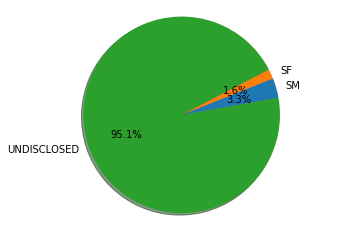

In [13]:
import matplotlib.pyplot as plt
labels = 'SM', 'SF', 'UNDISCLOSED'
sizes = [DM_shape[0]/total_size, DF_shape[0]/total_size, UNDIS_shape[0]/total_size]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=10)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Split disclosed dataset into train, test and validation

In [ ]:
# Split disclosed dataset into train, test and validation
# train: text, gender
# test: name, text, gender
# validation: text, gender

In [51]:
from sklearn.model_selection import train_test_split
from pathlib import Path
reddit_dir = Path.cwd() / 'datasets/reddit/'


if 'disclosed_dataset_df' in locals():
    print('existed.')
    # 80/20 train/test
    train_df, test_df = train_test_split(disclosed_dataset_df, test_size=0.2)
    # 80/20 train/validation
    train_df, validation_df = train_test_split(train_df, test_size=0.2)
else:
    disclosed_dataset_df = pd.read_csv(reddit_dir / 'disclosed_dataset.csv')
    # 80/20 train/test
    train_df, test_df = train_test_split(disclosed_dataset_df, test_size=0.2)
    # 80/20 train/validation
    train_df, validation_df = train_test_split(train_df, test_size=0.2)

existed.


In [53]:
# extracting related attributes for training, validation and test

# gender_map = {'male': 0, 'female': 1}
train_gender_text_df = train_df[['Gender', 'Text']]
# train_gender_text_df.replace({'Gender': gender_map}, inplace=True)
validation_gender_text_df = validation_df[['Gender', 'Text']]
# validation_gender_text_df.replace({'Gender': gender_map}, inplace=True)
test_name_text_gender_df = test_df[['UserName', 'Text', 'Gender']]
# test_name_text_gender_df.replace({'Gender': gender_map}, inplace=True)

# train_gender_text_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
train_gender_text_df.to_csv(reddit_dir / 'training_gender_text.csv', index=False, header=False)

# validation_gender_text_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
validation_gender_text_df.to_csv(reddit_dir / 'validation_gender_text.csv', index=False, header=False)

# test_name_text_gender_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
test_name_text_gender_df.to_csv(reddit_dir / 'test_name_text_gender.csv', index=False, header=False)

In [54]:
# undisclosed_gender_df.rename(columns={'body': 'Text'}, inplace=True)
# undisclosed_gender_df = pd.read_csv(reddit_dir / 'undisclosed_dataset.csv')
undisclosed_gender_df = undisclosed_gender_df[['UserName', 'Text', 'Gender']]
# undisclosed_gender_df.replace({'Gender': gender_map}, inplace=True)
# undisclosed_gender_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
undisclosed_gender_df.to_csv(reddit_dir / 'undisclosed_id_text_gender.csv', index=False, header=False)

# Only using when forget to map gender to numerical number 0, 1

In [ ]:
from pathlib import Path
import pandas as pd
reddit_dir = Path.cwd() / 'datasets/reddit/'
train_gender_text_df = pd.read_csv(reddit_dir / 'training_gender_text.csv', names=['Gender', 'Text'])
validation_gender_text_df = pd.read_csv(reddit_dir / 'validation_gender_text.csv', names=['Gender', 'Text'])

gender_map = {'male': 0, 'female': 1}
train_gender_text_df.replace({'Gender': gender_map}, inplace=True)
validation_gender_text_df.replace({'Gender': gender_map}, inplace=True)

train_gender_text_df.to_csv(reddit_dir / 'training_gender_text_mapped.csv', index=False, header=False)
validation_gender_text_df.to_csv(reddit_dir / 'validation_gender_text_mapped.csv', index=False, header=False)


In [ ]:
from pathlib import Path
import pandas as pd

reddit_dir = Path.cwd() / 'datasets/reddit/'
undisclosed_id_gender_text_df = pd.read_csv(reddit_dir / 'undisclosed_id_text_gender.csv', names=['UserName', 'Text', 'Gender'])

gender_map = {'male': 0, 'female': 1}
train_gender_text_df.replace({'Gender': gender_map}, inplace=True)

In [ ]:
# accuracy: 0.7296723086106249 at epoch: 9


# reprocess undisclosed dataset

In [ ]:
if not Path(reddit_dir / 'undisclosed_dataset.csv').exists():
    print('saving undisclosed dataset to csv')
    undisclosed_gender_df.to_csv(reddit_dir / 'undisclosed_dataset.csv', index=False)
else:
    undisclosed_gender_df = pd.read_csv(reddit_dir / 'undisclosed_dataset.csv')
    
undisclosed_gender_df.rename(columns={'body': 'Text'}, inplace=True)


In [ ]:
test_df = undisclosed_gender_df.sample(100000)

In [ ]:
test_df['UserId'] = test_df.groupby('UserName').grouper.group_info[0]
test_df.head()

In [ ]:
sorted_df = test_df.sort_values(by=['UserId'])

In [ ]:
sorted_df.loc[sorted_df['UserId'] == 10006]

In [ ]:
test_df[test_df.isna().any(axis=1)]

In [ ]:
undisclosed_gender_df['UserId']  = undisclosed_gender_df.groupby('UserName').grouper.group_info[0]

In [ ]:
undisclosed_gender_df.head()

In [ ]:
# grouped_dataframe = undisclosed_gender_df.groupby('UserId')
# for name_of_the_group, group in grouped_dataframe:
#     print (name_of_the_group)
#     print (group)

In [ ]:
undisclosed_gender_df = undisclosed_gender_df[['UserName', 'Text', 'Gender']]
undisclosed_gender_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
undisclosed_gender_df.to_csv(reddit_dir / 'undisclosed_id_text_gender.csv', index=False, header=False)